In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
loan_data= pd.read_csv("/content/drive/MyDrive/ML_Lab01/train.csv")

In [7]:
loan_data

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status
0,NaN,NaN,14000,14000,14000.0,36 months,7.35,434.53,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,2000,2000,2000.0,36 months,16.29,70.61,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,5000,5000,4750.0,36 months,7.39,155.28,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,20600,20600,20600.0,36 months,11.99,684.12,B,B5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,10000,10000,10000.0,36 months,7.39,310.56,A,A4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517783,NaN,NaN,3600,3600,3600.0,36 months,20.31,134.36,D,D5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
517784,NaN,NaN,8000,8000,8000.0,36 months,13.99,273.39,C,C3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
517785,NaN,NaN,14000,14000,13925.0,60 months,18.25,357.42,D,D3,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,0
517786,NaN,NaN,5200,5200,5200.0,36 months,17.27,186.10,C,C5,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


Missing value plot

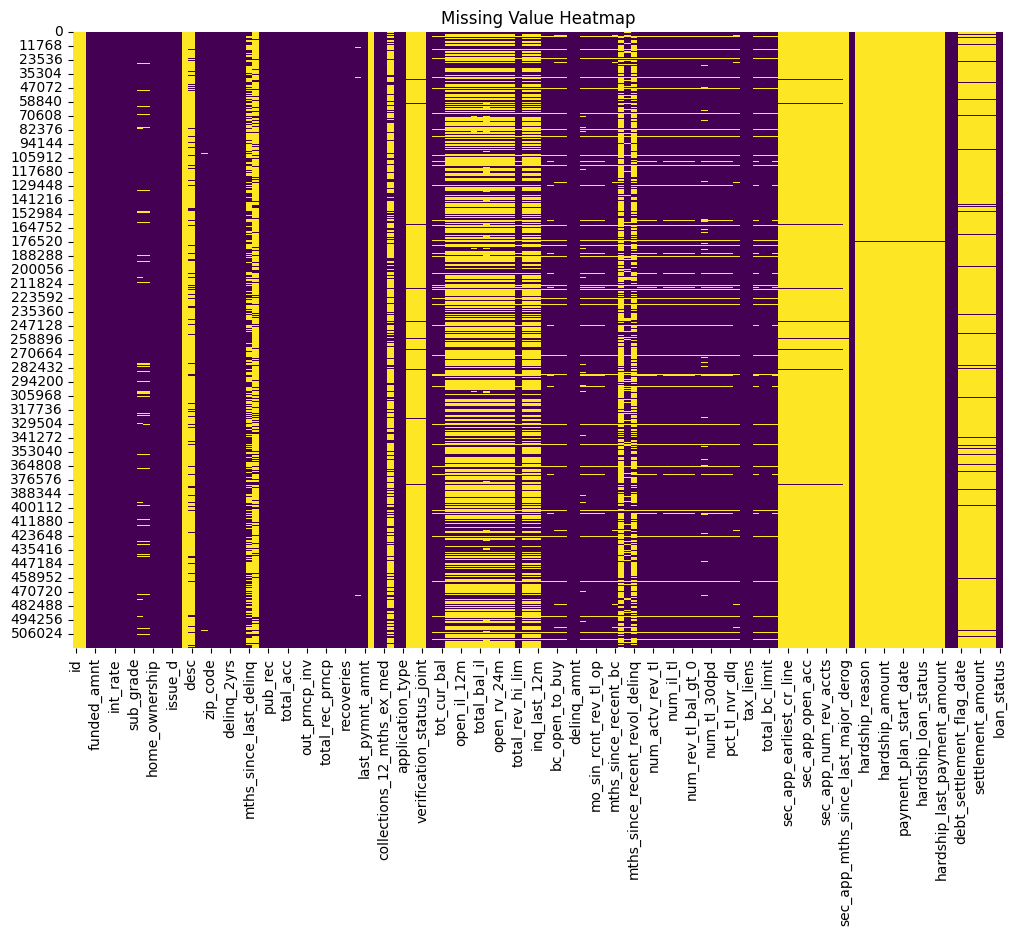

In [8]:
plt.figure(figsize=(12, 8))
sns.heatmap(loan_data.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Value Heatmap")
plt.show()

# Handling missing values

In [9]:
missing_values_count=loan_data.isnull().sum()
missing_values_count[0:10]

id                 517788
member_id          517788
loan_amnt               0
funded_amnt             0
funded_amnt_inv         0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
dtype: int64

In [10]:
total_entries=loan_data.shape[0]
percentage_missing=(missing_values_count/total_entries)*100

# Missing values (30%)

In [11]:
columns_with_high_missing = percentage_missing[percentage_missing > 30].index

print("Columns with more than 50% missing values:")
for column in columns_with_high_missing:
    loan_data = loan_data.drop(column, axis=1)

Columns with more than 50% missing values:


# Plot the dataframe with dropped columns which have more than 30% of missing values

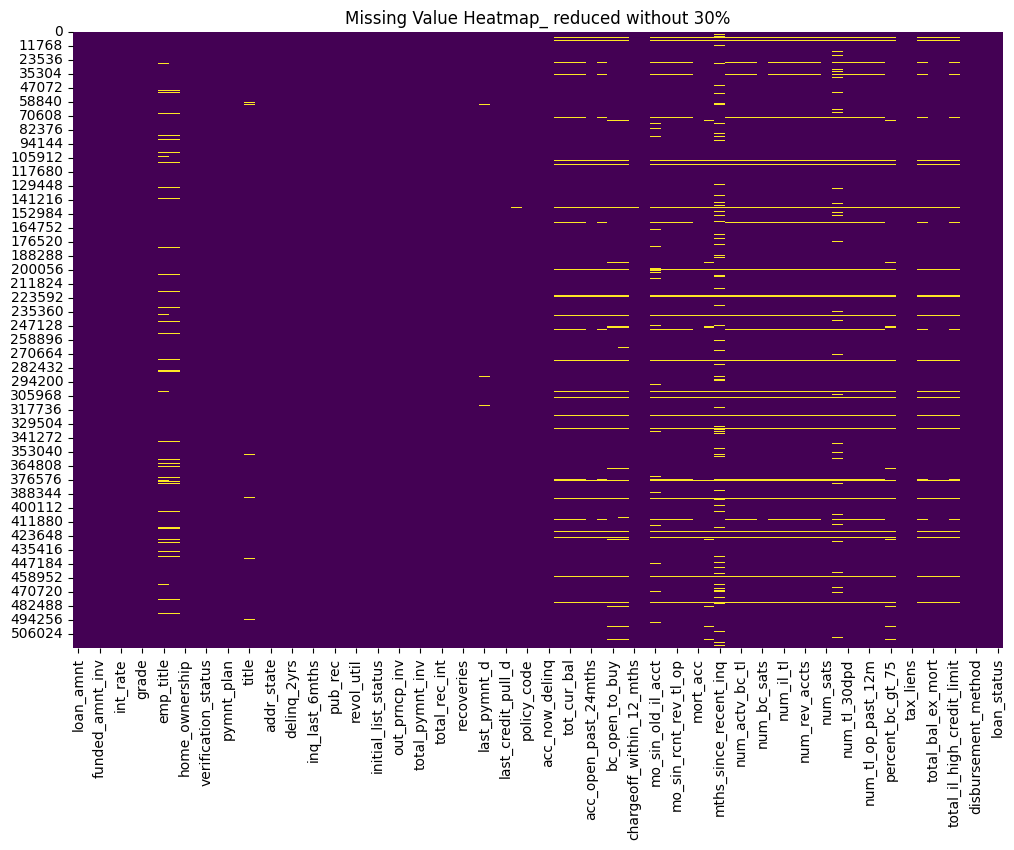

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(loan_data.isnull(), cmap='viridis', cbar=False)
plt.title("Missing Value Heatmap_ reduced without 30%")
plt.show()

In [ ]:
loan_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,...,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag,loan_status
0,14000,14000,14000.0,36 months,7.35,434.53,A,A4,Paralegal,1 year,...,0.0,1.0,67943.0,23659.0,13600.0,48043.0,N,Cash,N,1
1,2000,2000,2000.0,36 months,16.29,70.61,D,D2,NaN,NaN,...,1.0,0.0,9800.0,4168.0,1300.0,0.0,N,Cash,N,1
2,5000,5000,4750.0,36 months,7.39,155.28,A,A4,owner,4 years,...,0.0,0.0,237800.0,20061.0,64200.0,21600.0,N,Cash,N,1
3,20600,20600,20600.0,36 months,11.99,684.12,B,B5,NaN,NaN,...,0.0,0.0,105100.0,12355.0,15300.0,0.0,N,Cash,N,1
4,10000,10000,10000.0,36 months,7.39,310.56,A,A4,Senior UX designer,< 1 year,...,0.0,1.0,135735.0,141874.0,12000.0,123535.0,N,Cash,N,1


In [12]:
data_types = loan_data.dtypes

categorical_columns = data_types[data_types == 'object'].index
numerical_columns = data_types[data_types != 'object'].index

print("Categorical Columns:")
print(categorical_columns)

print("Numerical Columns:")
print(numerical_columns)

Categorical Columns:
Index(['term', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'verification_status', 'issue_d', 'pymnt_plan',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'last_credit_pull_d',
       'application_type', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag'],
      dtype='object')
Numerical Columns:
Index(['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'int_rate',
       'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_amnt',
       'collections_12_mths_ex_med', 'policy_code', 'acc_now_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'acc_open_p

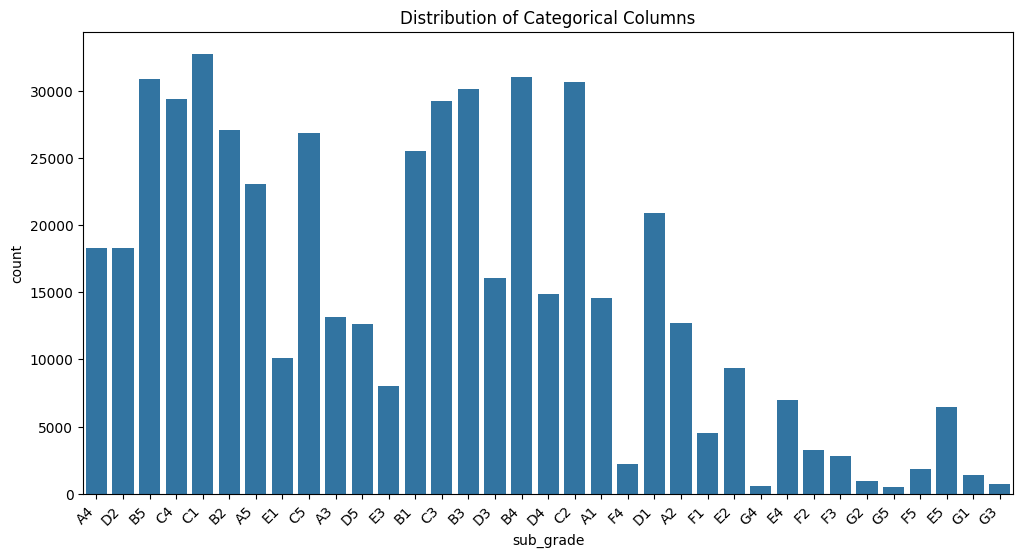

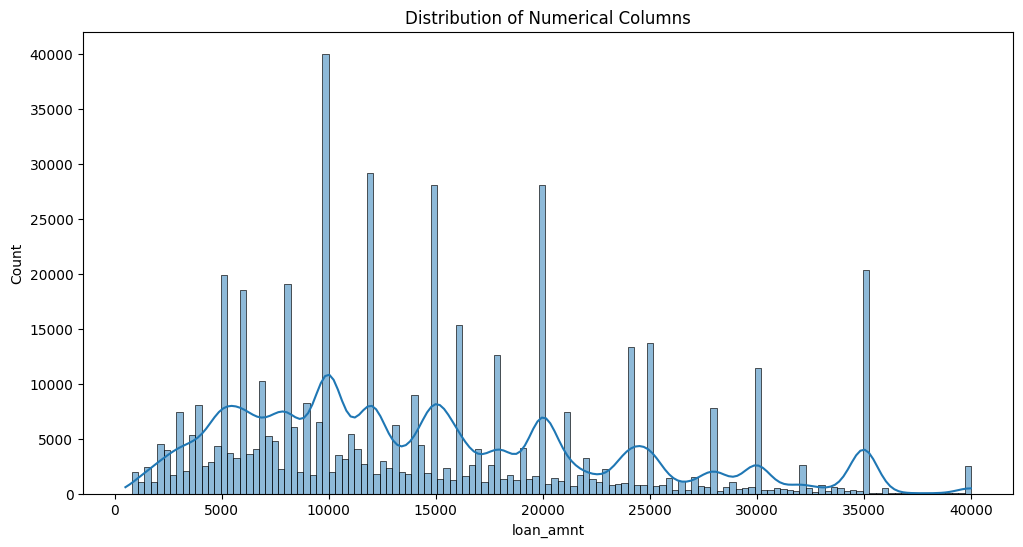

In [ ]:
# Plot the categorical columns
plt.figure(figsize=(12, 6))
sns.countplot(data=loan_data, x=categorical_columns[2])
plt.title("Distribution of Categorical Columns")
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot numerical columns
plt.figure(figsize=(12, 6))
sns.histplot(data=loan_data, x=numerical_columns[0], kde=True)
plt.title("Distribution of Numerical Columns")
plt.show()

# Filling missing values with mean and mode

In [13]:
loan_data[categorical_columns] = loan_data[categorical_columns].fillna(loan_data[categorical_columns].mode().iloc[0])  # Filling missing values categorical features with mode

loan_data[numerical_columns] = loan_data[numerical_columns].fillna(loan_data[numerical_columns].mean()) # Filling  missing values in numerical features with mean

# Find the correlation between every pair

In [14]:
correlation_matrix = loan_data.corr()
correlated_columns= set()

for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            Col_name = (correlation_matrix.columns[i])
            correlated_columns.add(Col_name)

print(correlated_columns)
# print("Number of correlated colums: ",len(correlated_columns))

<ipython-input-14-5aa9f082c514>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = loan_data.corr()


{'total_rec_int', 'last_pymnt_amnt', 'total_pymnt_inv', 'mo_sin_rcnt_tl', 'pub_rec_bankruptcies', 'total_pymnt', 'num_sats', 'total_rec_prncp', 'num_rev_accts', 'num_tl_90g_dpd_24m', 'total_rev_hi_lim', 'funded_amnt_inv', 'num_actv_rev_tl', 'num_tl_op_past_12m', 'num_bc_tl', 'avg_cur_bal', 'bc_util', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'num_bc_sats', 'total_bc_limit', 'num_tl_30dpd', 'num_op_rev_tl', 'funded_amnt', 'tax_liens', 'collection_recovery_fee', 'num_rev_tl_bal_gt_0', 'total_il_high_credit_limit', 'installment', 'total_acc', 'num_il_tl'}


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Find the outliers

In [ ]:

# numerical_columns = loan_data.select_dtypes(include=['float64', 'int64']).columns

# Create box plots to visualize outliers
plt.figure(figsize=(15, 8))
sns.boxplot(data=loan_data[numerical_columns])
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45, ha='right')
plt.show()

In [16]:
# Calculate the first quartile (Q1) and third quartile (Q3) for each feature
Q1 = loan_data.quantile(0.25)
Q3 = loan_data.quantile(0.75)

# Calculate the interquartile range (IQR) for each feature
IQR = Q3 - Q1

# Calculate the lower and upper bounds for outliers detection
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers for each feature
outliers = (loan_data < lower_bound) | (loan_data > upper_bound)

# Print the number of outliers for each feature
print("Number of outliers for each feature:")
print(outliers.sum())

<ipython-input-16-b7624ad4245f>:2: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q1 = loan_data.quantile(0.25)
<ipython-input-16-b7624ad4245f>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Q3 = loan_data.quantile(0.75)
<ipython-input-16-b7624ad4245f>:13: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  outliers = (loan_data < lower_bound) | (loan_data > upper_bound)


Number of outliers for each feature:
acc_now_delinq           2435
acc_open_past_24mths    26774
addr_state                  0
annual_inc              24087
application_type            0
                        ...  
total_rec_late_fee      28155
total_rec_prncp         16132
total_rev_hi_lim        32431
verification_status         0
zip_code                    0
Length: 87, dtype: int64


Selected Features

In [27]:
loan_data= pd.read_csv("/content/drive/MyDrive/ML_Lab01/train.csv")

selected_features = ['loan_amnt', 'term', 'int_rate', 'annual_inc', 'verification_status',
    'dti', 'delinq_2yrs', 'pub_rec', 'revol_bal',
    'initial_list_status', 'total_pymnt', 'mort_acc', 'total_rec_prncp',
    'bc_util', 'total_il_high_credit_limit', 'loan_status']

# Create a new DataFrame with selected features
final_loan_data = loan_data[selected_features]



In [28]:
final_loan_data.head(100)

,loan_amnt,term,int_rate,annual_inc,verification_status,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_pymnt,mort_acc,total_rec_prncp,bc_util,total_il_high_credit_limit,loan_status
0,14000,36 months,7.35,44000.0,Not Verified,34.70,0.0,1.0,1067,f,15118.387808,0.0,14000.00,3.3,48043.0,1
1,2000,36 months,16.29,11420.0,Verified,20.61,0.0,1.0,4168,w,2541.534174,0.0,2000.00,93.0,0.0,1
2,5000,36 months,7.39,65000.0,Not Verified,11.04,0.0,0.0,1043,f,5455.927032,4.0,5000.00,1.6,21600.0,1
3,20600,36 months,11.99,46956.0,Source Verified,24.43,0.0,0.0,12355,f,24600.724807,2.0,20600.00,60.0,0.0,1
4,10000,36 months,7.39,115000.0,Source Verified,17.94,0.0,1.0,9402,w,10952.605895,0.0,10000.00,78.3,123535.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1400,36 months,6.49,32000.0,Not Verified,25.21,0.0,0.0,6216,w,1543.539520,0.0,1400.00,72.9,38789.0,1
96,17000,36 months,7.89,90000.0,Source Verified,11.32,0.0,3.0,15414,w,19194.695843,3.0,17000.00,82.0,30808.0,1
97,30000,60 months,21.49,85000.0,Verified,30.21,0.0,0.0,10051,w,12703.450000,2.0,3398.51,91.5,79729.0,0
98,7200,36 months,11.53,300000.0,Source Verified,18.78,0.0,0.0,177513,f,8356.737083,2.0,7200.00,90.1,78134.0,1


# Scaling numerical features

In [19]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_numerical_data = pd.DataFrame(scaler.fit_transform(loan_data[numerical_columns]), columns=numerical_columns)

In [23]:
scaled_numerical_data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,...,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,loan_status
0,0.341772,0.341772,0.35000,0.079439,0.251156,0.004632,0.03570,0.0,0.0,0.092105,...,0.035714,1.000,0.00,0.000000,0.022222,0.006794,0.008947,0.024251,0.024021,1.0
1,0.037975,0.037975,0.05000,0.427570,0.038398,0.001202,0.02161,0.0,0.0,0.131579,...,0.142857,0.937,1.00,0.083333,0.000000,0.000980,0.001576,0.002318,0.000000,1.0
2,0.113924,0.113924,0.11875,0.080997,0.087899,0.006842,0.01204,0.0,0.0,0.092105,...,0.071429,1.000,0.00,0.000000,0.000000,0.023780,0.007586,0.114479,0.010800,1.0
3,0.508861,0.508861,0.51500,0.260125,0.397073,0.004943,0.02543,0.0,0.0,0.144737,...,0.000000,0.912,0.50,0.000000,0.000000,0.010510,0.004672,0.027282,0.000000,1.0
4,0.240506,0.240506,0.25000,0.080997,0.178680,0.012105,0.01894,0.0,0.0,0.223684,...,0.035714,0.970,0.25,0.000000,0.022222,0.013574,0.053650,0.021398,0.061767,1.0


# Feature Encoding

In [29]:
# Mapping dictionary
mapping = {" 36 months": 36, " 60 months": 60}

final_loan_data["term"] = final_loan_data["term"].map(mapping)

# Renaming the column to "term_binary"
final_loan_data.rename(columns={"term": "term"}, inplace=True)

(final_loan_data["term"])

<ipython-input-29-22eb74d2583b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_loan_data["term"] = final_loan_data["term"].map(mapping)
<ipython-input-29-22eb74d2583b>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_loan_data.rename(columns={"term": "term"}, inplace=True)


0         36
1         36
2         36
3         36
4         36
          ..
517783    36
517784    36
517785    60
517786    36
517787    36
Name: term, Length: 517788, dtype: int64

In [30]:
# binary encoding
#'initial_list_status'

# Mapping dictionary
mapping = {'f': 0, 'w': 1}

# Applying binary encoding
final_loan_data['initial_list_status'] = final_loan_data['initial_list_status'].map(mapping)

final_loan_data['initial_list_status']

<ipython-input-30-ced9b6b06ac8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_loan_data['initial_list_status'] = final_loan_data['initial_list_status'].map(mapping)


0         0
1         1
2         0
3         0
4         1
         ..
517783    0
517784    0
517785    0
517786    0
517787    1
Name: initial_list_status, Length: 517788, dtype: int64

In [31]:
final_loan_data

,loan_amnt,term,int_rate,annual_inc,verification_status,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_pymnt,mort_acc,total_rec_prncp,bc_util,total_il_high_credit_limit,loan_status
0,14000,36,7.35,44000.00,Not Verified,34.70,0.0,1.0,1067,0,15118.387808,0.0,14000.00,3.3,48043.0,1
1,2000,36,16.29,11420.00,Verified,20.61,0.0,1.0,4168,1,2541.534174,0.0,2000.00,93.0,0.0,1
2,5000,36,7.39,65000.00,Not Verified,11.04,0.0,0.0,1043,0,5455.927032,4.0,5000.00,1.6,21600.0,1
3,20600,36,11.99,46956.00,Source Verified,24.43,0.0,0.0,12355,0,24600.724807,2.0,20600.00,60.0,0.0,1
4,10000,36,7.39,115000.00,Source Verified,17.94,0.0,1.0,9402,1,10952.605895,0.0,10000.00,78.3,123535.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517783,3600,36,20.31,48000.00,Verified,24.33,0.0,0.0,11641,0,1637.630000,0.0,705.73,25.9,36574.0,0
517784,8000,36,13.99,68789.76,Source Verified,30.08,0.0,0.0,2966,0,9506.516869,1.0,8000.00,74.8,107550.0,1
517785,14000,60,18.25,86000.00,Source Verified,31.02,0.0,0.0,26064,0,4004.600000,0.0,900.66,95.4,57411.0,0
517786,5200,36,17.27,70000.00,Verified,26.03,0.0,0.0,10852,0,6699.304817,1.0,5200.00,82.7,69590.0,1


In [32]:
one_hot_encoded = pd.get_dummies(final_loan_data['verification_status'])

# Concatenate the one-hot encoded columns with the original DataFrame
loan_data_final = pd.concat([final_loan_data.drop('verification_status', axis=1), one_hot_encoded], axis=1)

loan_data_final

,loan_amnt,term,int_rate,annual_inc,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_pymnt,mort_acc,total_rec_prncp,bc_util,total_il_high_credit_limit,loan_status,Not Verified,Source Verified,Verified
0,14000,36,7.35,44000.00,34.70,0.0,1.0,1067,0,15118.387808,0.0,14000.00,3.3,48043.0,1,1,0,0
1,2000,36,16.29,11420.00,20.61,0.0,1.0,4168,1,2541.534174,0.0,2000.00,93.0,0.0,1,0,0,1
2,5000,36,7.39,65000.00,11.04,0.0,0.0,1043,0,5455.927032,4.0,5000.00,1.6,21600.0,1,1,0,0
3,20600,36,11.99,46956.00,24.43,0.0,0.0,12355,0,24600.724807,2.0,20600.00,60.0,0.0,1,0,1,0
4,10000,36,7.39,115000.00,17.94,0.0,1.0,9402,1,10952.605895,0.0,10000.00,78.3,123535.0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
517783,3600,36,20.31,48000.00,24.33,0.0,0.0,11641,0,1637.630000,0.0,705.73,25.9,36574.0,0,0,0,1
517784,8000,36,13.99,68789.76,30.08,0.0,0.0,2966,0,9506.516869,1.0,8000.00,74.8,107550.0,1,0,1,0
517785,14000,60,18.25,86000.00,31.02,0.0,0.0,26064,0,4004.600000,0.0,900.66,95.4,57411.0,0,0,1,0
517786,5200,36,17.27,70000.00,26.03,0.0,0.0,10852,0,6699.304817,1.0,5200.00,82.7,69590.0,1,0,0,1


In [33]:
# Move 'loan_status' column to the first position
column_order = ['loan_status'] + [col for col in loan_data_final.columns if col != 'loan_status']
loan_data_final = loan_data_final[column_order]

In [34]:
# importing the validation dataset to process it
loan_data_valid = pd.read_csv('/content/drive/MyDrive/ML_Lab01/valid.csv')
loan_data_valid.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term,loan_status
0,NaN,NaN,14575,14575,14575.0,60 months,17.57,366.71,D,D2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
1,NaN,NaN,10000,10000,10000.0,36 months,13.59,339.79,C,C2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
2,NaN,NaN,17000,17000,17000.0,36 months,13.35,575.67,C,C2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
3,NaN,NaN,4500,4500,4500.0,36 months,9.93,145.06,B,B2,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1
4,NaN,NaN,6250,6250,6250.0,36 months,12.99,210.56,B,B4,...,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN,1


In [38]:
selected_features = [
    'loan_amnt', 'term', 'int_rate', 'annual_inc', 'verification_status',
    'dti', 'delinq_2yrs', 'pub_rec', 'revol_bal',
    'initial_list_status', 'total_pymnt', 'mort_acc', 'total_rec_prncp',
    'bc_util', 'total_il_high_credit_limit', 'loan_status'
]

# Final dataframe with selected features

final_loan_data_valid = loan_data_valid[selected_features]
final_loan_data_valid

,loan_amnt,term,int_rate,annual_inc,verification_status,dti,delinq_2yrs,pub_rec,revol_bal,initial_list_status,total_pymnt,mort_acc,total_rec_prncp,bc_util,total_il_high_credit_limit,loan_status
0,14575,60 months,17.57,36500.0,Source Verified,20.55,0.0,0.0,14147,f,21968.927620,0.0,14575.0,81.8,16696.0,1
1,10000,36 months,13.59,66000.0,Source Verified,14.73,0.0,2.0,1302,w,11713.852323,0.0,10000.0,33.3,33832.0,1
2,17000,36 months,13.35,65000.0,Verified,25.06,0.0,0.0,12295,w,20681.812088,1.0,17000.0,91.4,68601.0,1
3,4500,36 months,9.93,21600.0,Source Verified,11.39,0.0,1.0,5357,f,4602.174334,0.0,4500.0,19.7,0.0,1
4,6250,36 months,12.99,35000.0,Not Verified,11.49,0.0,0.0,9811,f,7430.460000,0.0,6250.0,19.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172591,30000,36 months,22.90,108000.0,Not Verified,45.08,0.0,0.0,40042,f,30022.521667,1.0,30000.0,103.1,221682.0,1
172592,5000,36 months,12.49,33000.0,Source Verified,27.89,0.0,1.0,8017,w,6009.916175,1.0,5000.0,33.9,51931.0,1
172593,13000,36 months,7.89,49000.0,Not Verified,22.46,0.0,0.0,27516,w,14602.612390,0.0,13000.0,82.0,43118.0,1
172594,35000,36 months,12.99,100000.0,Verified,19.33,3.0,1.0,34694,w,13236.350000,2.0,6902.8,69.0,14820.0,0


In [36]:
# Mapping dictionary
mapping = {" 36 months": 36, " 60 months": 60}

final_loan_data_valid["term"] = final_loan_data_valid["term"].map(mapping)

# Renaming the column to "term_binary"
final_loan_data_valid.rename(columns={"term": "term"}, inplace=True)

(final_loan_data_valid["term"])

<ipython-input-36-9d1d1295036a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_loan_data_valid["term"] = final_loan_data_valid["term"].map(mapping)
<ipython-input-36-9d1d1295036a>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_loan_data_valid.rename(columns={"term": "term"}, inplace=True)


0         60
1         36
2         36
3         36
4         36
          ..
172591    36
172592    36
172593    36
172594    36
172595    36
Name: term, Length: 172596, dtype: int64

In [37]:
# binary encoding
# initial_list_status_binary

mapping = {'f': 0, 'w': 1}

# Applying binary encoding
final_loan_data_valid['initial_list_status'] = final_loan_data_valid['initial_list_status'].map(mapping)
final_loan_data_valid['initial_list_status']

<ipython-input-37-e6ab6af001ce>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_loan_data_valid['initial_list_status'] = final_loan_data_valid['initial_list_status'].map(mapping)


0         0
1         1
2         1
3         0
4         0
         ..
172591    0
172592    1
172593    1
172594    1
172595    1
Name: initial_list_status, Length: 172596, dtype: int64

In [ ]:
final_loan_data

In [ ]:
one_hot_encoded = pd.get_dummies(final_loan_data_valid['verification_status'])

# Concatenate the one-hot encoded columns with the original DataFrame
final_loan_data_valid = pd.concat([final_loan_data_valid.drop('verification_status', axis=1), one_hot_encoded], axis=1)

final_loan_data_valid

In [ ]:
loan_data_final

# XGBooster

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score

X_train = loan_data_final.drop('loan_status', axis=1)
y_train = loan_data_final['loan_status']

X_valid = final_loan_data_valid.drop('loan_status', axis=1)
y_valid = final_loan_data_valid['loan_status']

# Convert datasets into DMatrix format
dtrain = xgb.DMatrix(X_train, label=y_train)
dvalid = xgb.DMatrix(X_valid, label=y_valid)

# Parameters for XGBoost
params = {
    'objective': 'binary:logistic',  # binary classification
    'eval_metric': 'logloss'  # Logarithmic Loss as evaluation metric
}

# Train the XGBoost model
num_rounds = 100  # Number of boosting rounds
model = xgb.train(params, dtrain, num_rounds, evals=[(dvalid, 'validation')], early_stopping_rounds=10)

# Make predictions on validation data
y_pred = model.predict(dvalid)

# Convert probabilities to binary predictions
y_pred_binary = [1 if pred > 0.5 else 0 for pred in y_pred]

# Evaluate the model
accuracy = accuracy_score(y_valid, y_pred_binary)
print("Validation Accuracy:", accuracy)


In [ ]:
# import the test dataset

import pandas as pd
loan_data_test = pd.read_csv('/content/drive/MyDrive/ML_Lab01/X_test.csv')
loan_data_test.head()

In [ ]:
selected_features = [
    'loan_amnt', 'term', 'int_rate', 'annual_inc', 'verification_status',
    'dti', 'delinq_2yrs', 'pub_rec', 'revol_bal',
    'initial_list_status', 'total_pymnt', 'mort_acc', 'total_rec_prncp',
    'bc_util', 'total_il_high_credit_limit'
]
final_loan_data_test = loan_data_test[selected_features]
final_loan_data_test

In [ ]:
# Mapping dictionary
mapping = {" 36 months": 36, " 60 months": 60}
final_loan_data_test["term"] = loan_data_test["term"].map(mapping)

# Renaming the column to "term_binary"
final_loan_data_test.rename(columns={"term": "term"}, inplace=True)
final_loan_data_test["term"]

In [ ]:
# binary encoding initial_list_status_binary column

mapping = {'f': 0, 'w': 1}

# Applying binary encoding
final_loan_data_test['initial_list_status'] = final_loan_data_test['initial_list_status'].map(mapping)

final_loan_data_test['initial_list_status']

In [ ]:
one_hot_encoded = pd.get_dummies(final_loan_data_test['verification_status'])

# Concatenate the one-hot encoded columns with the original DataFrame
final_loan_data_test = pd.concat([final_loan_data_test.drop('verification_status', axis=1), one_hot_encoded], axis=1)

final_loan_data_test

In [ ]:
# Convert test dataset into DMatrix format
dtest = xgb.DMatrix(final_loan_data_test)

# Make predictions on test data
y_pred_test = model.predict(dtest)

# Convert probabilities to binary predictions
y_pred_test_binary = [1 if pred > 0.5 else 0 for pred in y_pred_test]

In [ ]:
import pandas as pd

# Convert the binary predictions to a pandas DataFrame
predictions_df = pd.DataFrame(y_pred_test_binary, columns=['predicted_loan_status'])

# Concatenate the predictions DataFrame to the front of final_df_test
final_loan_data_test_with_predictions = pd.concat([predictions_df, final_loan_data_test], axis=1)

final_loan_data_test_with_predictions

# Export the dataframe as a csv file

In [ ]:
csv_file_path = '/content/drive/MyDrive/ML_Lab01/210257F.csv'

# Save the dataframe as a CSV file
final_loan_data_test_with_predictions.to_csv(csv_file_path, index=False)

In [ ]:
pip install shap

In [ ]:
import shap

# Explain the model's predictions using SHAP
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# Plot the SHAP summary plot
shap.summary_plot(shap_values, X_train, plot_type="bar", show=False)